In [2]:
#!/usr/bin/python3

#To run PaDEL
#java -jar PaDEL-Descriptor.jar

#Data Loading
from rdkit import Chem
import pandas as pd

data = pd.read_csv("processed_endo_data.csv")

smiles = data['Canonical SMILES']
tox_vals = data["Toxicity Value"]
dataframe = pd.DataFrame({'SMILES': smiles, 'Toxicity_Value': tox_vals})

FileNotFoundError: [Errno 2] No such file or directory: 'processed_endo_data.csv'

In [10]:
#SMILE Visualisation (Graph Format)

from rdkit.Chem import Draw
test = Chem.MolFromSmiles(smiles[423])
img = Draw.MolToImage(test)
img

from SmilesPE.pretokenizer import atomwise_tokenizer

smi = smiles[423]
toks = atomwise_tokenizer(smi)
print(toks)

#Loop to print first x SMILES

#loops = 0
#for items in smiles:
#   if loops == 3:
#        break
#    item = Chem.MolFromSmiles(smiles)
#    img = Draw.MolToImage(items)
#    loops = loops + 1

#img = Draw.MolToImage(m)

#for atom in m.GetAtoms():
#  print(atom.GetAtomicNum())




['C', 'c', '1', 'c', 'c', 'c', '(', 'C', '(', 'C', ')', '(', 'C', ')', 'C', ')', 'c', '(', 'O', ')', 'c', '1']


FileNotFoundError: [Errno 2] No such file or directory: 'LogisticRegression.pkl'

In [17]:
import rdkit.Avalon.pyAvalonTools as ava
avates = ava.GetAvalonCountFP(test)

In [16]:
print(avates)

In [78]:
print(len(smiles))

13244


In [32]:
#DeepSMILES Conversion

import deepsmiles
print("DeepSMILES version: %s" % deepsmiles.__version__)
converter = deepsmiles.Converter(rings=True, branches=True)
print(converter) # record the options used
encoded = converter.encode("c1cccc(C(=O)Cl)c1")
print("Encoded: %s" % encoded)

deepsmiles = []
loops = 0

for items in smiles: 
    
    try:
        encoded = converter.encode(items)
        decoded = converter.decode(encoded)
    except deepsmiles.DecodeError as e:
        decoded = None
        print("DecodeError! Error message was '%s'" % e.message)

    if decoded:
        deepsmiles.append(decoded)
        #print("Decoded: %s" % decoded)
    
print(deepsmiles[1:5])

dsmiledf = pd.DataFrame(list(zip(deepsmiles, tox_vals)),
               columns =['DeepSMILE', 'Toxicity_Value'])

dsmiledf.to_csv('deepSMILEdata.csv', index=False)

DeepSMILES version: 1.0.1
Converter(rings=True, branches=True)
Encoded: cccccC=O)Cl))c6
['COc1ccccc1N3CCN(CCCC(=O)c2ccc(F)cc2)CC3', 'CNC(=O)Oc1cccc2c1OC(C)(C)C2', 'Cc1cc(Cl)ccc1O', 'CCCN(CCC)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-]']


In [37]:
#SMILESPE Conversion

import codecs
from SmilesPE.learner import *
output = codecs.open('deepspepatterns', 'w')
learn_SPE(deepsmiles, output, 30000, min_frequency=200, augmentation=1, verbose=True, total_symbols=True)

Counting SMILES...
7624 unique Canonical SMILES
Augmenting SMILES...(1 times)


[16:51:30] WARNING: not removing hydrogen atom without neighbors


20263 unique SMILES (Canonical + Augmented)
Gettting Pair Statistics


Number of unique characters & Reducing number of merge operations by: 118
Unique characters: {'N', 'Cl', '[C@]', '7', '6', 'c', '[nH+]', '4', '-', '[o+]', '[Hg]', '[Ni+2]', '[Sr+2]', '%11', '[Co+]', '[Co+2]', '[cH-]', 'o', '[nH]', '[n-]', '1', '2', '[N-]', '[PH]', '[2H]', '[Ba]', '3', 'C', '[Yb]', '[Na+]', '[Cr]', 's', '[Cu+]', '[C@H]', '[se]', '[Cr+2]', '[AlH3]', '9', '(', '%13', '[Li+]', 'Br', '[Zr]', '[As]', '[P+]', '[In]', '[Ca+2]', '[Dy]', '\\', '[B-]', '%12', '[Pt]', '[N@+]', '#', '[Mn+2]', '[Sb]', '[NH4+]', '[NH2+]', '[Ni]', '[K+]', '[Cu+2]', '[Ge]', '[Zn]', '[Mo]', '[Ti]', '[S-]', '[S+]', 'P', 'O', '[Mn+]', '[s+]', '[SiH]', 'I', '8', '[N+]', '[Cu]', '[Mg+2]', 'n', '5', '[Fe-]', '[Nd]', '[Au-]', '[Au]', '[Ti+2]', '.', '[Se]', '[Ca]', '[O-]', '[Pd]', '[C@@H]', '[Si]', '[C@@]', '[C-]', '[Zn+2]', '[Sn]', 'F', '%10', '[NH3+]', '/', '[Gd+3]', '[N@@+]', '[Cd]', '[Bi]', '[Na]', '[Cl+3]', '%14', '[O+]', '=', '[Fe+3]', '[n+]', '[Fe+2]', ')', '[V]', 'S', '[H+]', '[Ba+2]', '[NH+]', 'B'}
pa

pair 184: CCO C(=O) -> CCOC(=O) (frequency 378)
pair 185: CCN (CC -> CCN(CC (frequency 374)
pair 186: C(O) =O) -> C(O)=O) (frequency 372)
pair 187: C( O -> C(O (frequency 359)
pair 188: [C@] 2 -> [C@]2 (frequency 358)
pair 189: [C@@] 1 -> [C@@]1 (frequency 356)
pair 190: CC(=O) O -> CC(=O)O (frequency 356)
pair 191: CC(C) (C) -> CC(C)(C) (frequency 348)
pair 192: [C@H] 4 -> [C@H]4 (frequency 347)
pair 193: CN 1 -> CN1 (frequency 346)
pair 194: P ( -> P( (frequency 342)
pair 195: )cc ( -> )cc( (frequency 342)
pair 196: c( N -> c(N (frequency 341)
pair 197: c1ccc( N -> c1ccc(N (frequency 339)
pair 198: CCCC C -> CCCCC (frequency 339)
pair 199: C(F)(F) F) -> C(F)(F)F) (frequency 339)
pair 200: OCC OCC -> OCCOCC (frequency 338)
pair 201: C(CC ) -> C(CC) (frequency 334)
pair 202: = S) -> =S) (frequency 334)
pair 203: CC ) -> CC) (frequency 333)
pair 204: CC 3 -> CC3 (frequency 331)
pair 205: [C@H] (O -> [C@H](O (frequency 330)
pair 206: )cc c1 -> )ccc1 (frequency 330)
pair 207: cc cc1 -> cc

pair 510: CC C2 -> CCC2 (frequency 104)
pair 511: C(= C) -> C(=C) (frequency 104)
pair 512: ( CO -> (CO (frequency 104)
pair 513: c1ccc(N )cc1 -> c1ccc(N)cc1 (frequency 103)
pair 514: CC= CC= -> CC=CC= (frequency 103)
pair 515: C(C)=C / -> C(C)=C/ (frequency 103)
pair 516: C 5 -> C5 (frequency 103)
pair 517: (O) O -> (O)O (frequency 103)
pair 518: [C@H] (N -> [C@H](N (frequency 102)
pair 519: O c2ccc( -> Oc2ccc( (frequency 102)
pair 520: CCN(CC )CC -> CCN(CC)CC (frequency 102)
pair 521: CCCCCCCC CCCCCC -> CCCCCCCCCCCCCC (frequency 102)
pair 522: C(=O)N 3 -> C(=O)N3 (frequency 102)
pair 523: C Cl -> CCl (frequency 102)
pair 524: /N =N/ -> /N=N/ (frequency 102)
pair 525: c3c( c1) -> c3c(c1) (frequency 101)
pair 526: N =C( -> N=C( (frequency 101)
pair 527: N (C)C -> N(C)C (frequency 101)
pair 528: CCN (CC) -> CCN(CC) (frequency 101)
pair 529: (CC (=O)O) -> (CC(=O)O) (frequency 101)
pair 530: C=C [C@]1(C) -> C=C[C@]1(C) (frequency 100)
pair 531: C [C@]3 -> C[C@]3 (frequency 100)
no pair ha

In [45]:
#Quick SMILE Visualiser

from rdkit.Chem import Draw

smilemols = []
for items in smiles:
    smilemols.append(Chem.MolFromSmiles(items))
test = Chem.MolFromSmiles('NC[C@]12CCCC2C3CC1CC3')

img = []

for items in smilemols[1:5]:
    img.append(Draw.MolToImage(items))

[19:29:22] WARNING: not removing hydrogen atom without neighbors


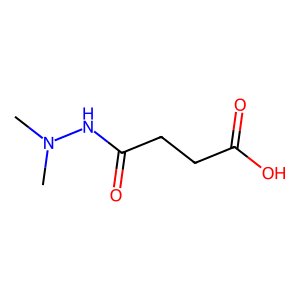

In [49]:
Draw.MolToImage(smilemols[6])

In [39]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
import rdkit
print(rdkit.__version__)
%matplotlib

2023.09.5
Using matplotlib backend: <object object at 0x147959b10>


In [6]:
#Molecular Fingerprint creation
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(dataframe,'SMILES', 'Structure')

NameError: name 'dataframe' is not defined

In [5]:
dataframe.head()

NameError: name 'dataframe' is not defined

In [4]:
# Generate MACCS key generation (good for substructures)
from rdkit.Chem import MACCSkeys
from rdkit.Avalon import pyAvalonTools
MACCSfp = []
Avafp = []
Morganfp = []
Rdkfp = []
TTorsionfp = []

for items in df.Structure:
    MACCSfp.append(MACCSkeys.GenMACCSKeys(items))
    Avafp.append(pyAvalonTools.GetAvalonFP(items, nBits=512))
    Morganfp.append(rdMolDescriptors.GetMorganFingerprintAsBitVect(items, radius=2))
    Rdkfp.append(AllChem.RDKFingerprint(items, maxPath=5, fpSize=512))
    TTorsionfp.append(rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(items, nBits=512))
    

NameError: name 'df' is not defined

In [184]:
fingerprints = [MACCSfp, Avafp, Morganfp, Rdkfp, TTorsionfp]

In [1]:
Morganfp

NameError: name 'Morganfp' is not defined

In [167]:
#Converts fingerprints to dataframes and appends them to original dataset
Maccsdata = []
loops = 0
for items in MACCSfp:
    data = np.array(items)
    Maccsdata.append(data)
Maccsframe = pd.DataFrame(Maccsdata)
newframe = pd.concat([dataframe, Maccsframe], axis=1)

In [200]:
fingerlist

[       0    1    2    3    4    5    6    7    8    9    ...  157  158  159  \
 0        0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
 1        0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
 2        0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
 3        0    0    0    0    0    0    0    0    0    0  ...    1    0    0   
 4        0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
 ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 13239    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
 13240    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
 13241    0    0    0    0    0    0    0    0    0    0  ...    1    0    1   
 13242    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
 13243    0    0    0    0    0    0    0    0    0    0  ...    1    0    1   
 
        160  161  162  163  164  165  

In [ ]:
fingerlist = [maccsdata.csv, avadata.csvm morgandata.csv, rdkdata.csv, ttorsiondata.csv]

In [201]:
#Converts fingerprints to dataframes and appends them to original dataset
fingerlist = ['maccsdata.csv', 'avadata.csvm', 'morgandata.csv', 'rdkdata.csv', 'ttorsiondata.csv']
loops = 0
for items in fingerprints:
    data = []
    for items in items:
        set = np.array(items)
        data.append(set)
    fingerlist[loops] = pd.DataFrame(data)
    #newframe = pd.concat([dataframe, Maccsframe], axis=1)
    loops = loops + 1

In [204]:
#Attaches fingerprints to existing dataframe

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0,0,0,0,1,1,0,0,0,0,...,1,0,1,0,0,1,1,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,1,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13239,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,1,0
13240,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
13241,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
13242,1,0,1,1,1,1,0,1,1,1,...,1,0,1,1,0,0,1,0,1,0


In [221]:
newframe = pd.concat([dataframe, fingerlist[0], fingerlist[1], fingerlist[2], fingerlist[3], fingerlist[4]], axis=1)

In [223]:
newframe.to_csv('finger_combined.csv', index=False)